Bibliotecas

In [121]:
from skimage import morphology
from scipy.ndimage import distance_transform_edt
from skimage import io, color
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import skeletonize, thin, disk
from scipy.ndimage import binary_hit_or_miss

Extração de Esqueleto

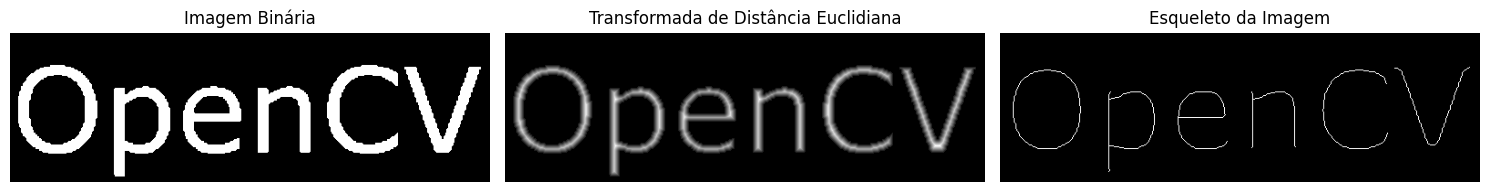

In [122]:
# Carregar a imagem e convertê-la para binária
imagem = io.imread('openCV.png', as_gray=True)
imagem_binaria = imagem > 0.5  # Thresholding simples para binarização

# Calcular a transformada de distância Euclidiana
distancia = distance_transform_edt(imagem_binaria)

# Aplicar a extração do esqueleto na transformada de distância
esqueleto = morphology.skeletonize(distancia)

# Exibir os resultados
plt.figure(figsize=(15, 5))

# Imagem Binária
plt.subplot(1, 3, 1)
plt.imshow(imagem_binaria, cmap='gray')
plt.title('Imagem Binária')
plt.axis('off')

# Transformada de Distância Euclidiana
plt.subplot(1, 3, 2)
plt.imshow(distancia, cmap='gray')
plt.title('Transformada de Distância Euclidiana')
plt.axis('off')

# Esqueleto
plt.subplot(1, 3, 3)
plt.imshow(esqueleto, cmap='gray')
plt.title('Esqueleto da Imagem')
plt.axis('off')

plt.tight_layout()
plt.show()


Sem uso de biblioteca

In [123]:
# Função para exibir a imagem em cada etapa
def mostrar_imagem(img, titulo="im_5.png"):
    plt.imshow(img, cmap="gray")
    plt.title(titulo)
    plt.axis("off")
    plt.show()

In [124]:
# Função para carregar e binarizar a imagem
def carregar_e_binarizar_imagem(caminho, threshold=0.5):
    imagem = io.imread(caminho, as_gray=True)
    imagem_binaria = (imagem < threshold).astype(bool)  # Binarizar (inverter para 0=fundo, 1=frente)
    return imagem_binaria

In [125]:
# Função de erosão
def erode(image, structuring_element):
    eroded = np.zeros_like(image)
    se_center = structuring_element.shape[0] // 2
    
    for i in range(se_center, image.shape[0] - se_center):
        for j in range(se_center, image.shape[1] - se_center):
            region = image[i-se_center:i+se_center+1, j-se_center:j+se_center+1]
            if np.array_equal(region & structuring_element, structuring_element):
                eroded[i, j] = 1
    return eroded

In [126]:
# Função de dilatação
def dilate(image, structuring_element):
    dilated = np.zeros_like(image)
    se_center = structuring_element.shape[0] // 2
    
    for i in range(se_center, image.shape[0] - se_center):
        for j in range(se_center, image.shape[1] - se_center):
            region = image[i-se_center:i+se_center+1, j-se_center:j+se_center+1]
            if np.any(region & structuring_element):
                dilated[i, j] = 1
    return dilated

In [127]:
# Função para calcular a abertura (erosão seguida de dilatação)
def opening(image, structuring_element):
    return dilate(erode(image, structuring_element), structuring_element)

In [128]:
# Função para subtrair duas imagens
def subtract(image1, image2):
    return np.clip(image1 - image2, 0, 1)

In [129]:
# Função de esqueletonização com visualização passo a passo
def skeletonize(image, structuring_element):
    skeleton = np.zeros_like(image)
    current_image = image.copy()
    i = 0
    
    while np.any(current_image):
        # Erosão
        eroded = erode(current_image, structuring_element)
        mostrar_imagem(eroded, f"Erosão {i + 1}")
        
        # Abertura da imagem erodida
        opened = opening(eroded, structuring_element)
        mostrar_imagem(opened, f"Abertura {i + 1}")
        
        # Subtração para obter a camada do esqueleto
        skel_layer = subtract(eroded, opened)
        mostrar_imagem(skel_layer, f"Camada do Esqueleto {i + 1}")
        
        # Acumular a camada no esqueleto final
        skeleton |= skel_layer
        
        # Atualizar a imagem atual para a próxima erosão
        current_image = eroded
        i += 1
        
    return skeleton

#### Imagem Exemplo do Livro

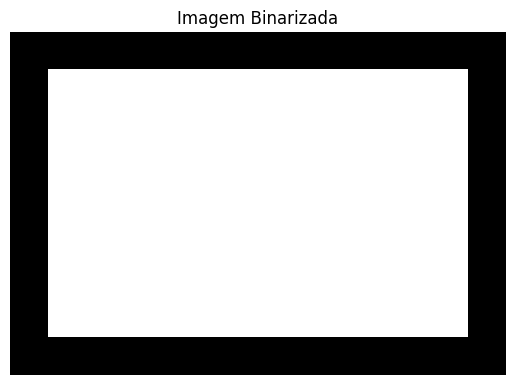

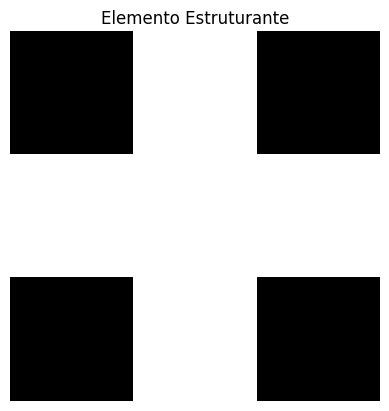

In [130]:
A = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])

# Definição do elemento estruturante B
B = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
])

# Mostrar o esqueleto final
mostrar_imagem(A, "Imagem Binarizada")

# Mostrar o esqueleto final
mostrar_imagem(B, "Elemento Estruturante")

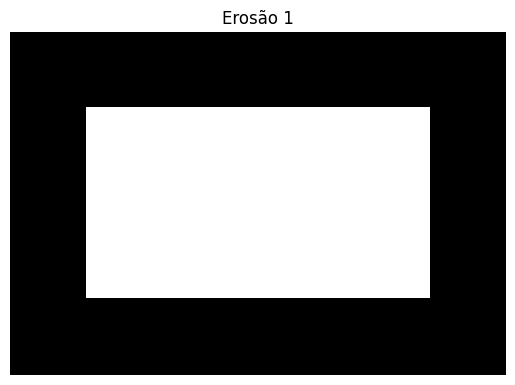

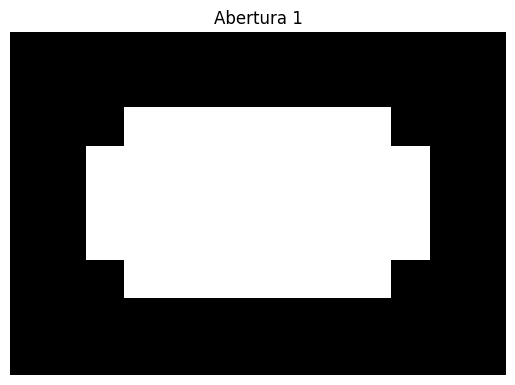

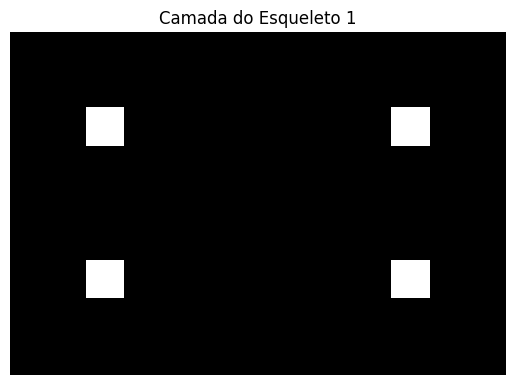

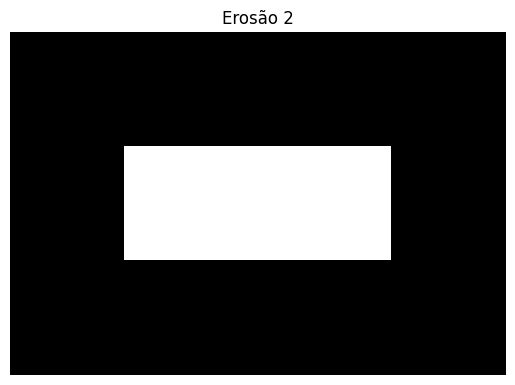

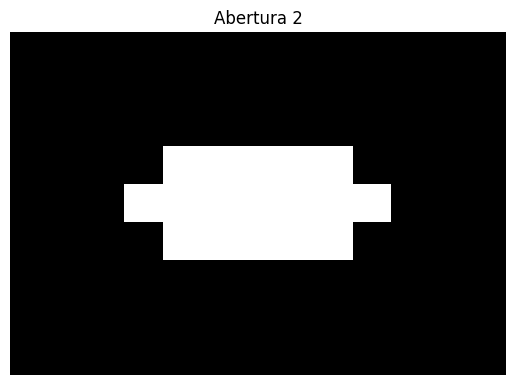

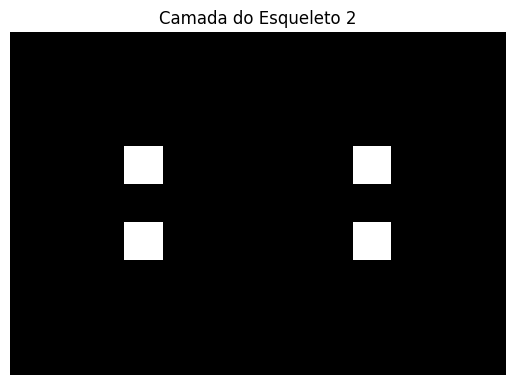

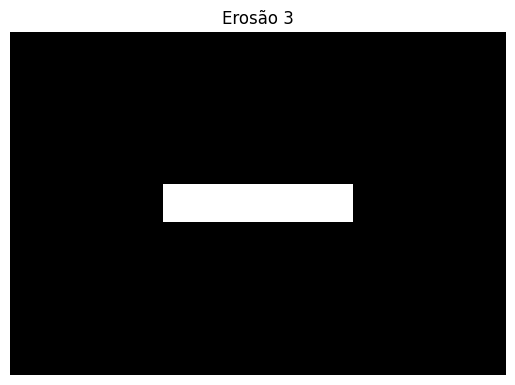

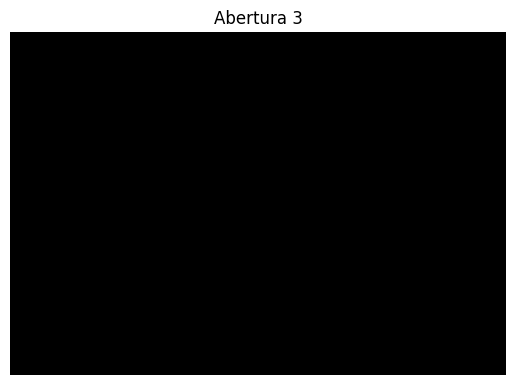

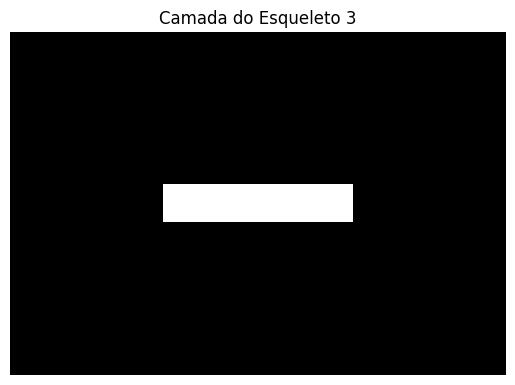

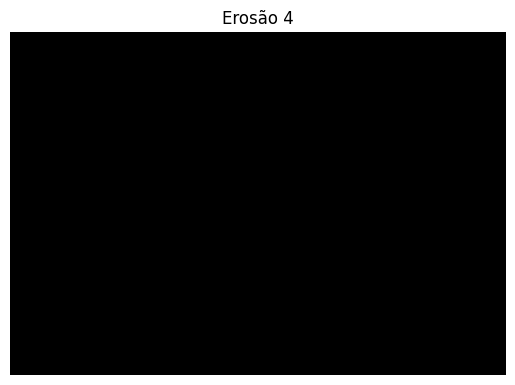

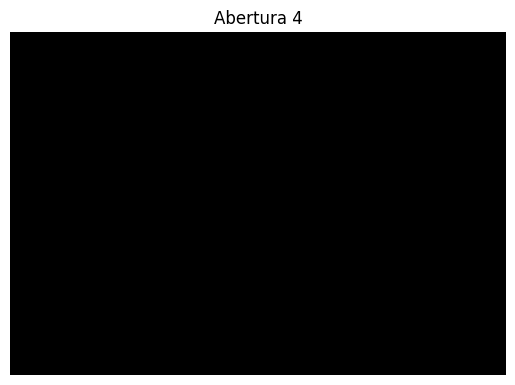

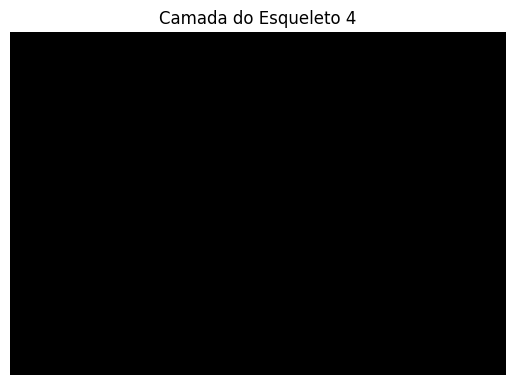

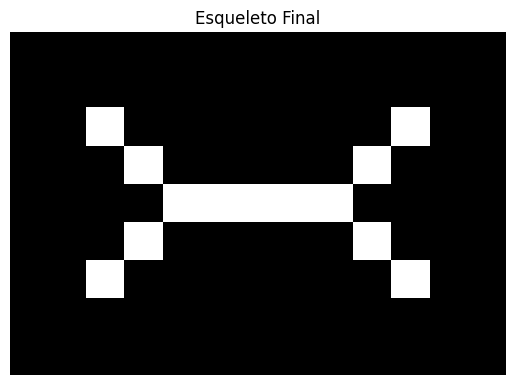

In [131]:
# Aplicar o algoritmo de esqueletonização
skeleton = skeletonize(A, B)

# Mostrar o esqueleto final
mostrar_imagem(skeleton, "Esqueleto Final")


#### Imagem de Exemplo - Binarizada

In [132]:
# Função de erosão
def erode(image, structuring_element):
    eroded = np.zeros_like(image, dtype=bool)
    se_center = structuring_element.shape[0] // 2
    
    for i in range(se_center, image.shape[0] - se_center):
        for j in range(se_center, image.shape[1] - se_center):
            region = image[i-se_center:i+se_center+1, j-se_center:j+se_center+1]
            if np.array_equal(region & structuring_element, structuring_element):
                eroded[i, j] = 1
    return eroded

In [133]:
# Função de dilatação
def dilate(image, structuring_element):
    dilated = np.zeros_like(image, dtype=bool)
    se_center = structuring_element.shape[0] // 2
    
    for i in range(se_center, image.shape[0] - se_center):
        for j in range(se_center, image.shape[1] - se_center):
            region = image[i-se_center:i+se_center+1, j-se_center:j+se_center+1]
            if np.any(region & structuring_element):
                dilated[i, j] = 1
    return dilated

In [134]:
# Função para subtrair duas imagens usando XOR
def subtract(image1, image2):
    return image1 ^ image2  # XOR bitwise entre as imagens

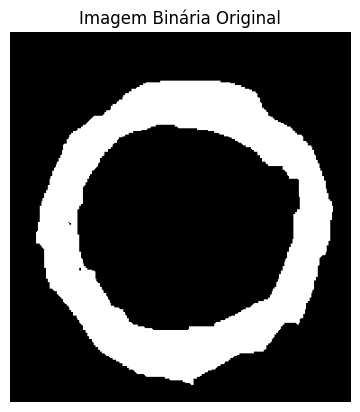

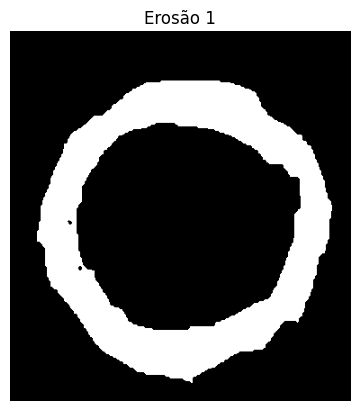

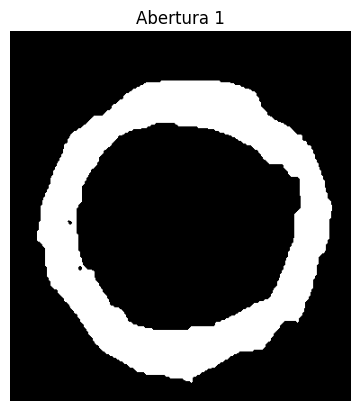

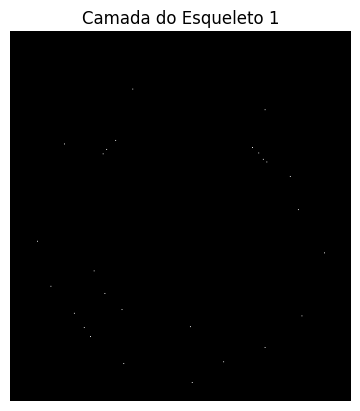

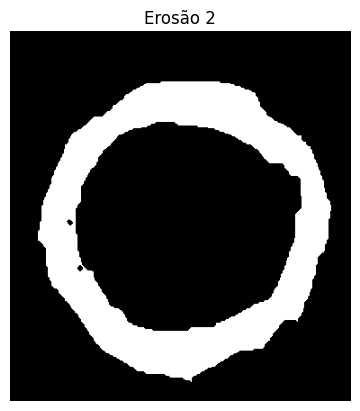

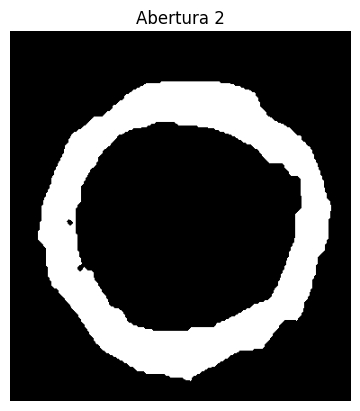

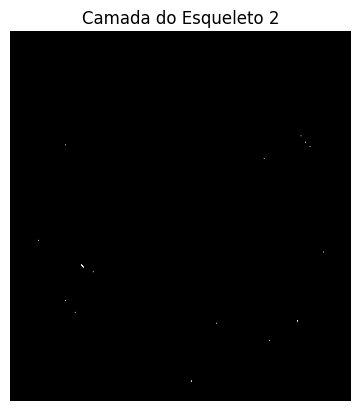

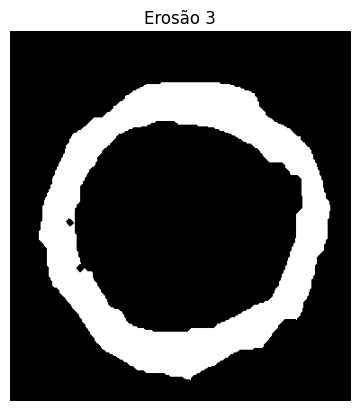

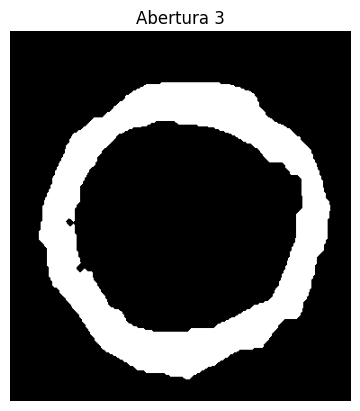

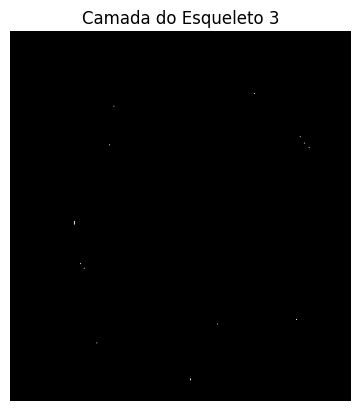

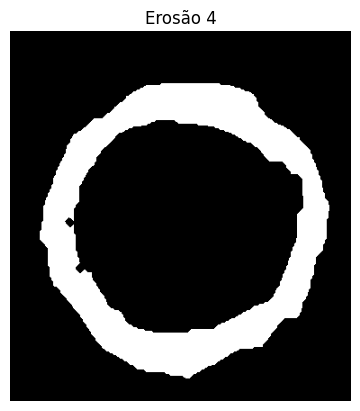

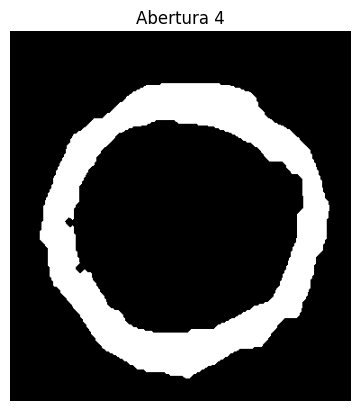

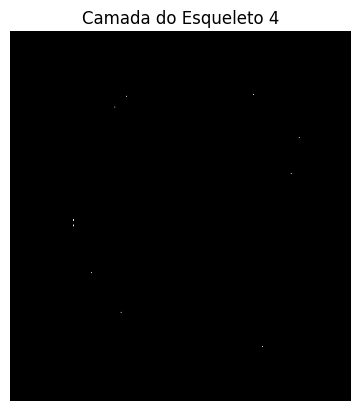

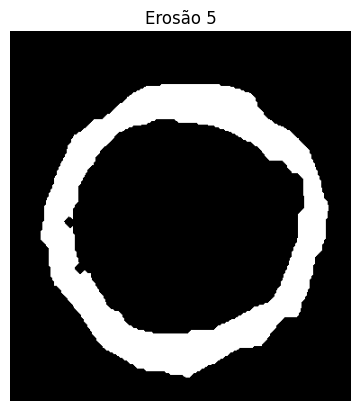

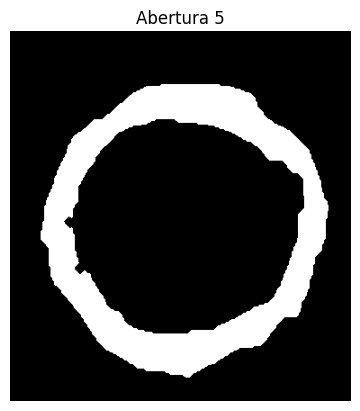

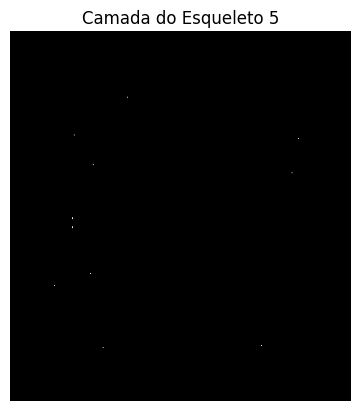

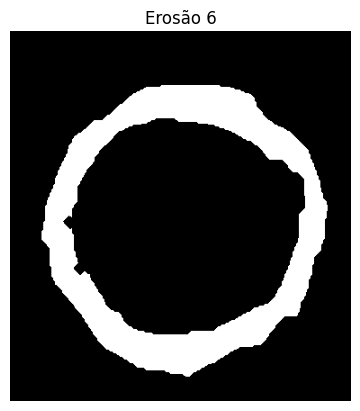

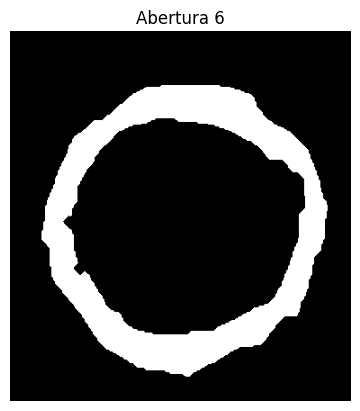

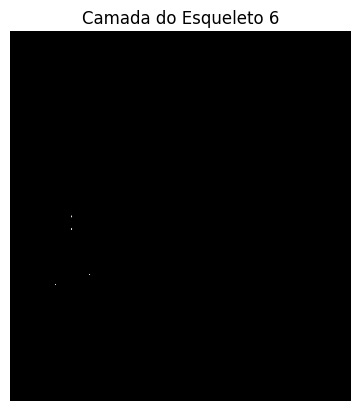

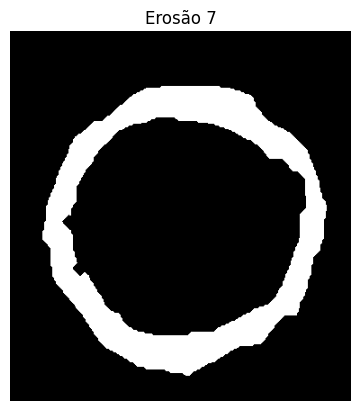

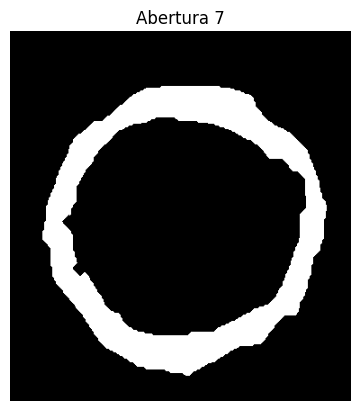

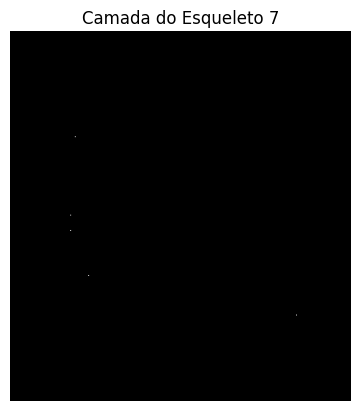

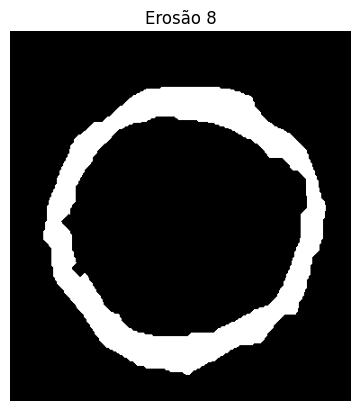

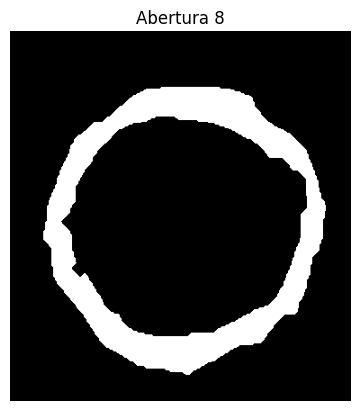

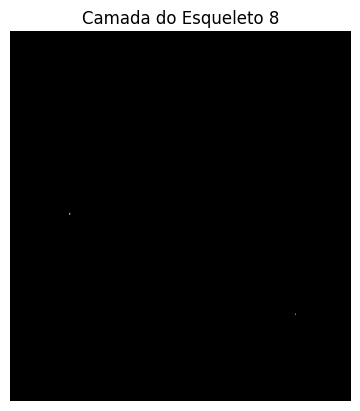

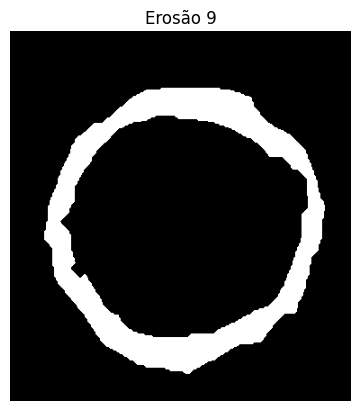

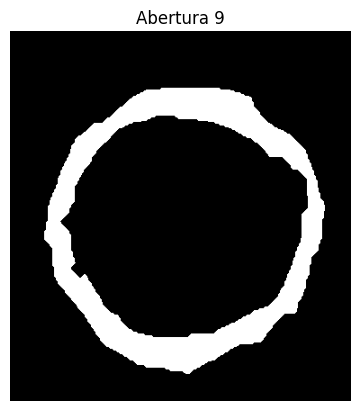

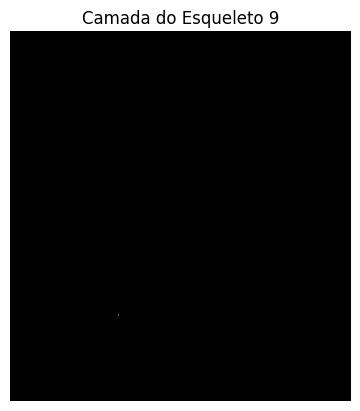

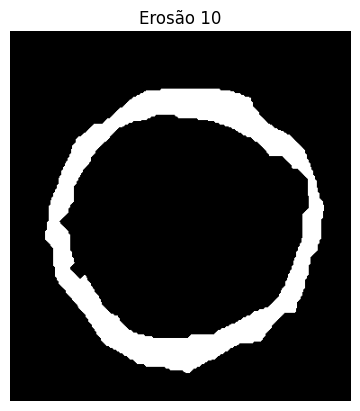

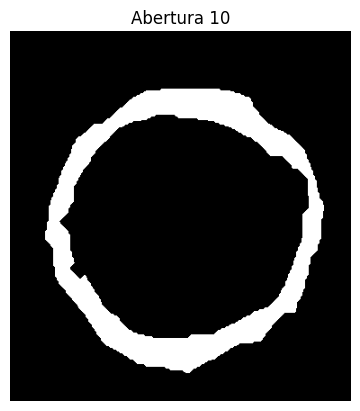

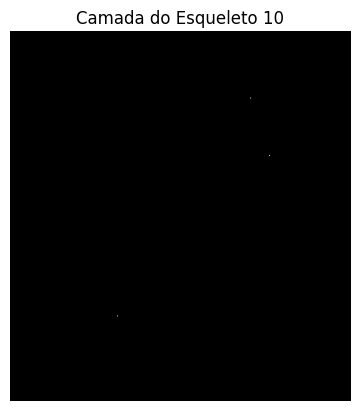

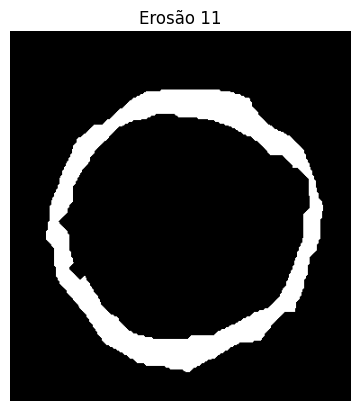

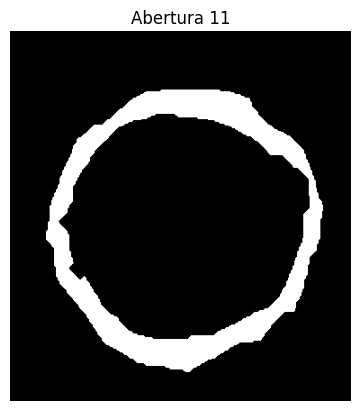

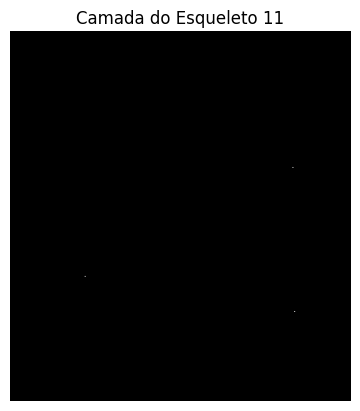

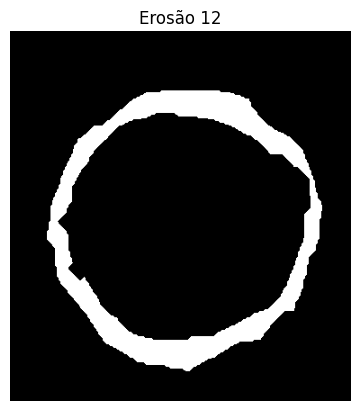

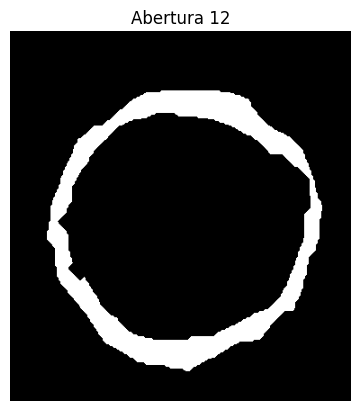

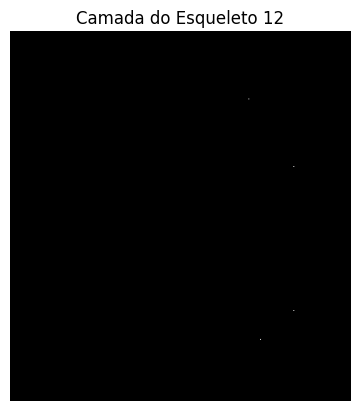

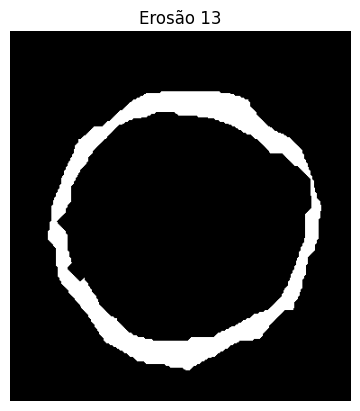

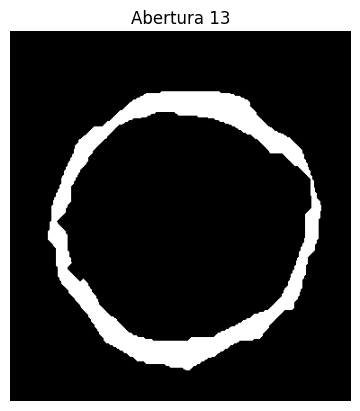

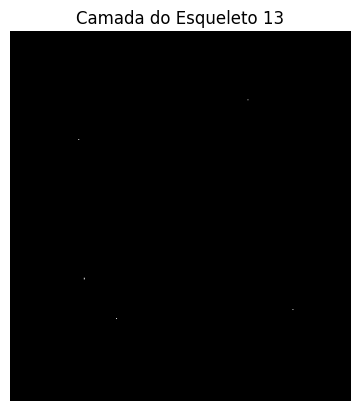

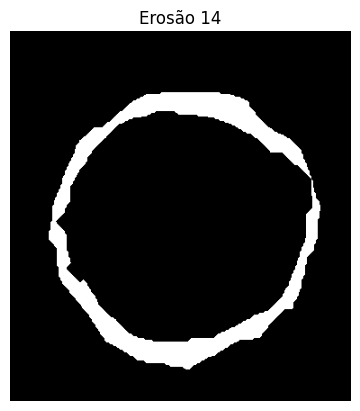

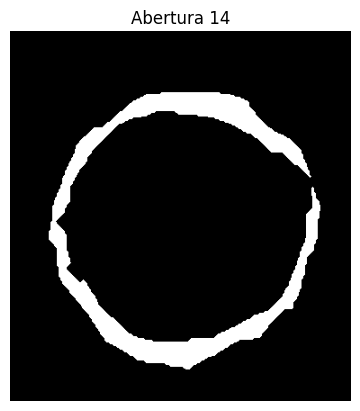

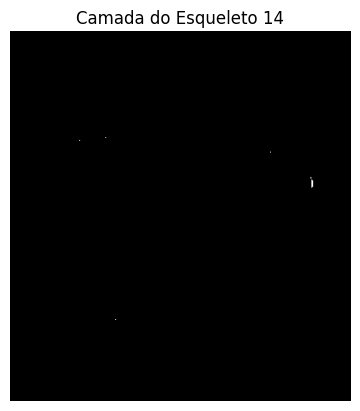

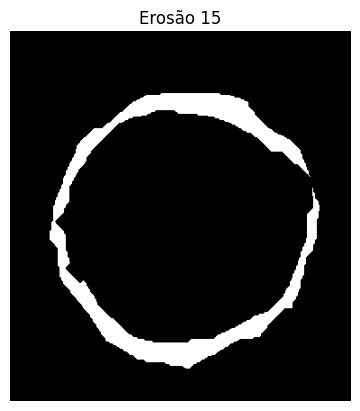

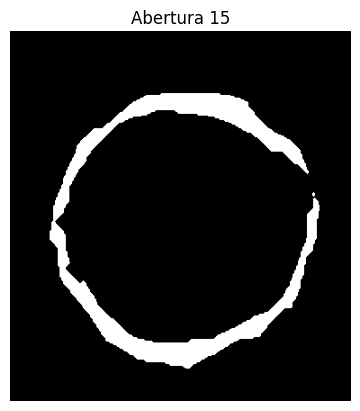

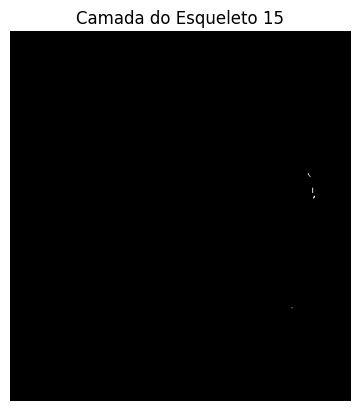

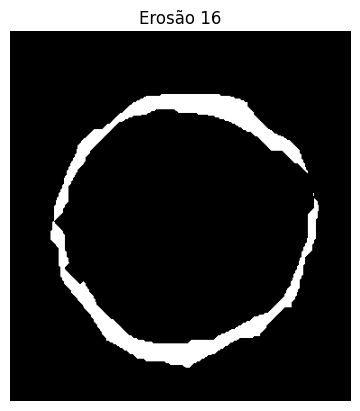

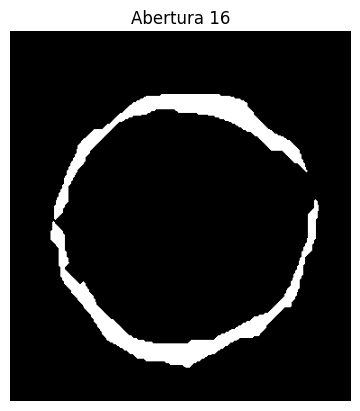

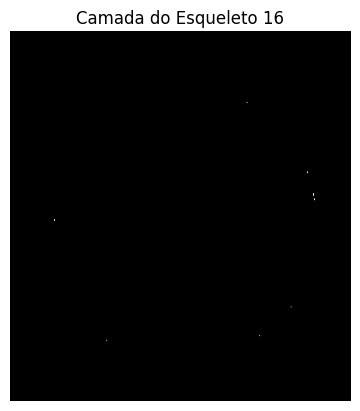

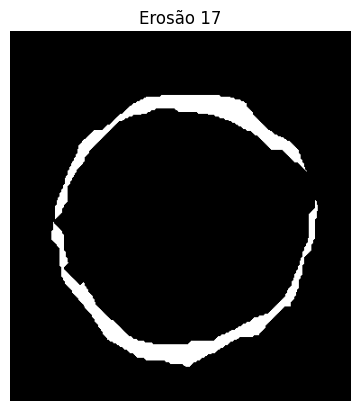

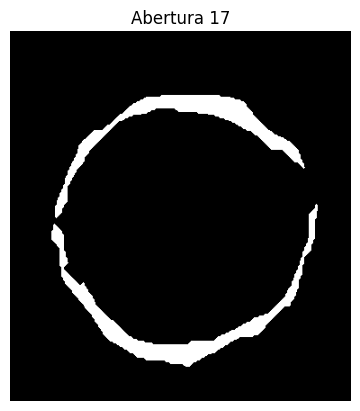

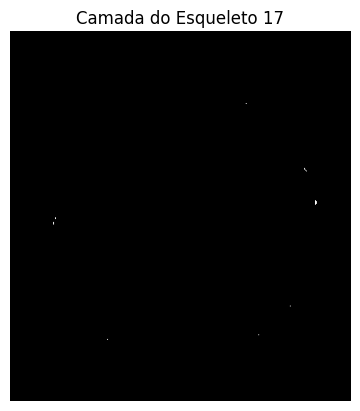

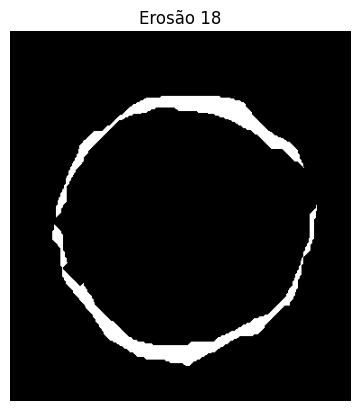

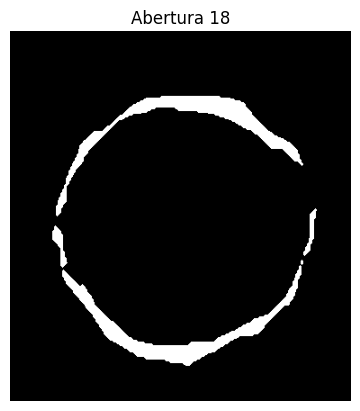

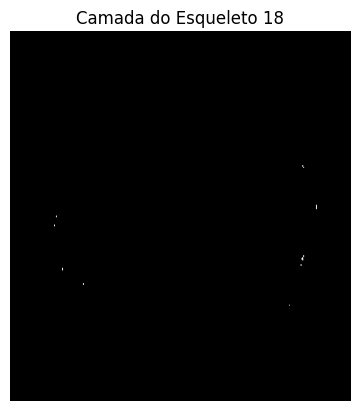

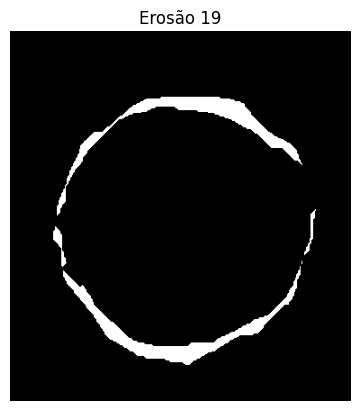

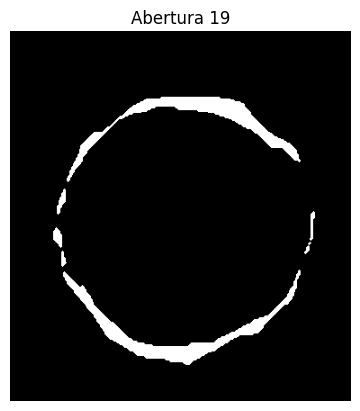

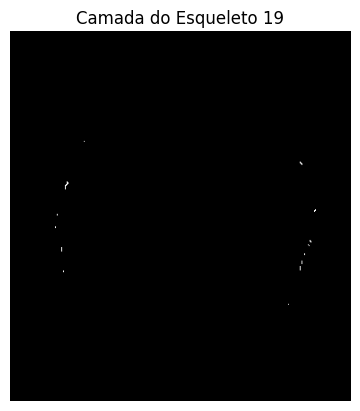

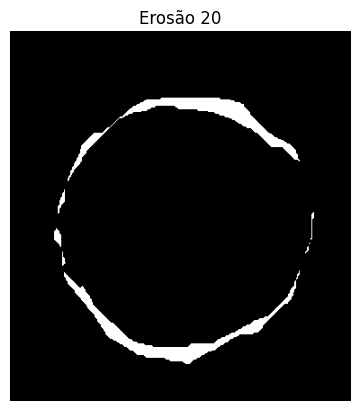

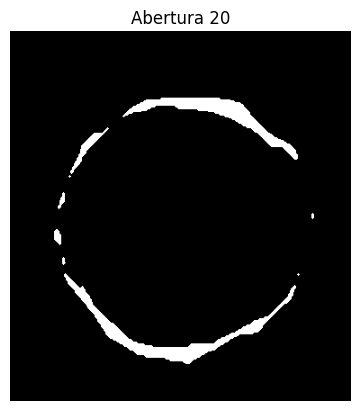

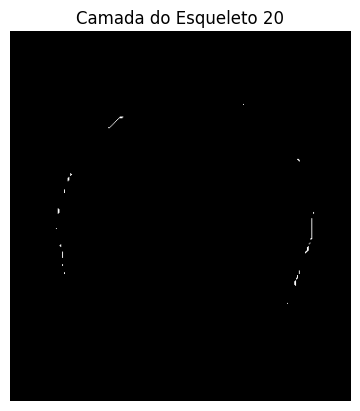

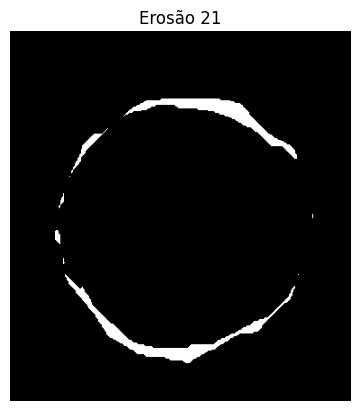

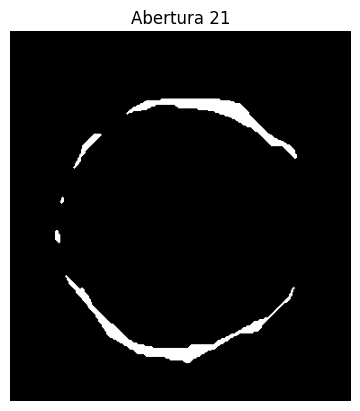

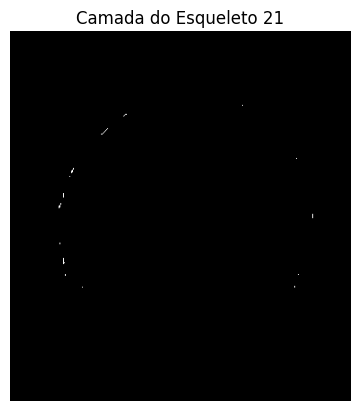

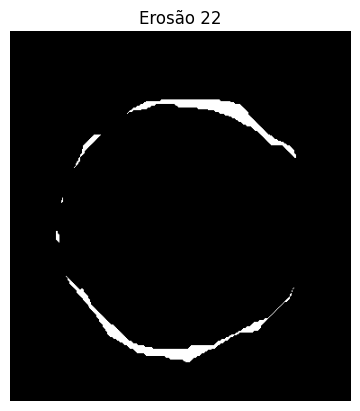

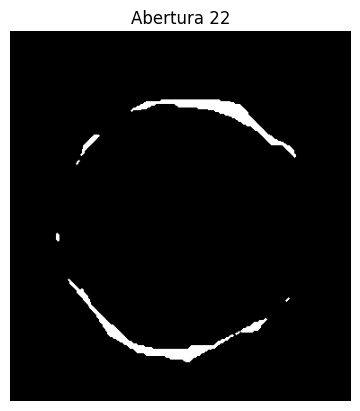

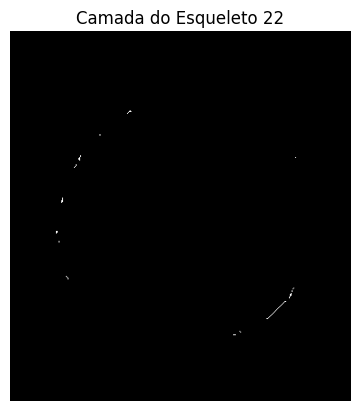

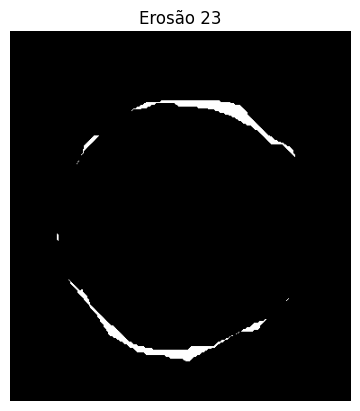

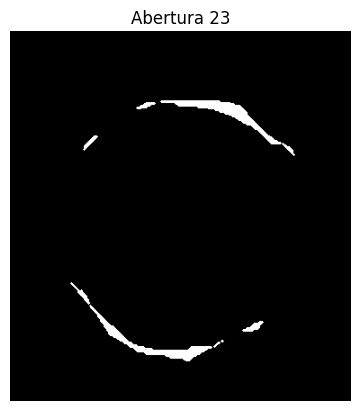

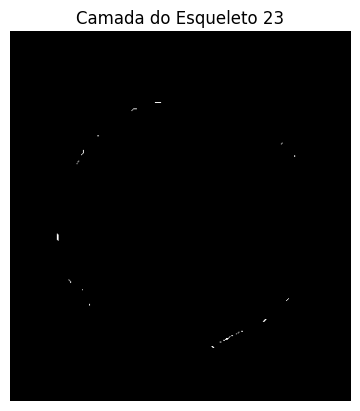

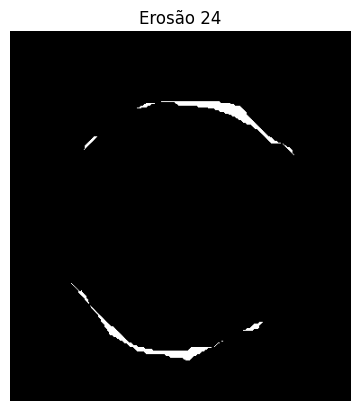

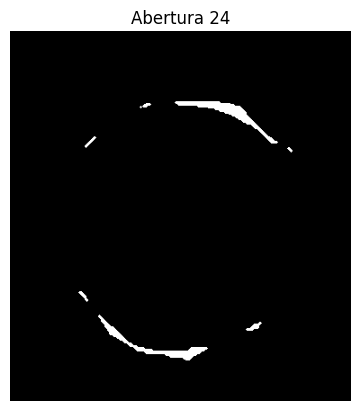

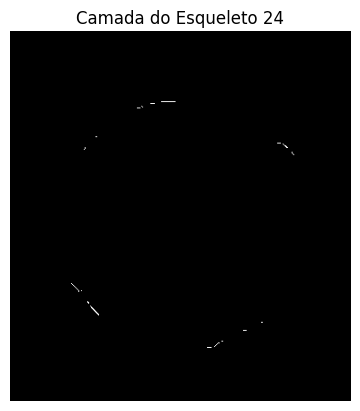

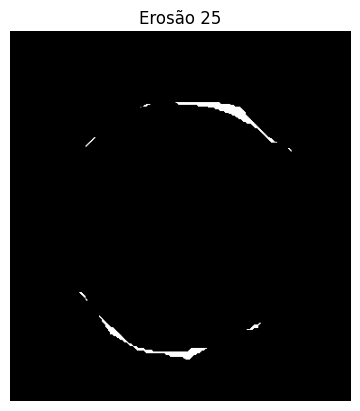

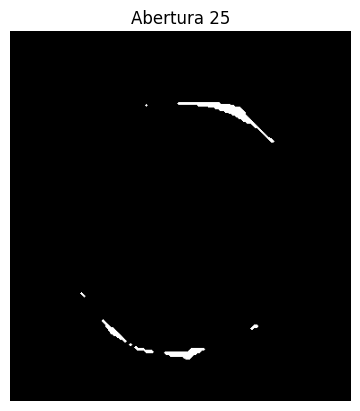

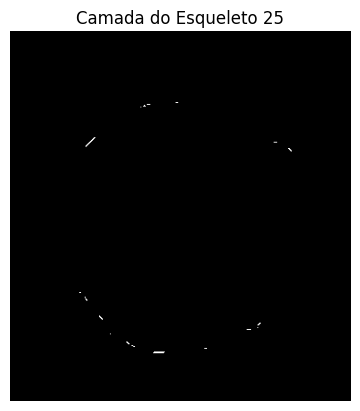

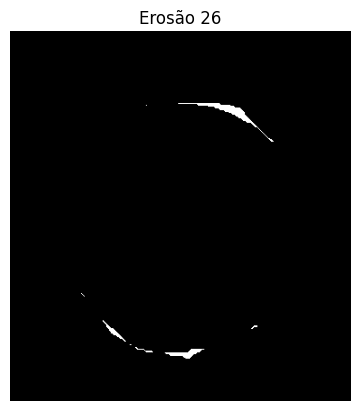

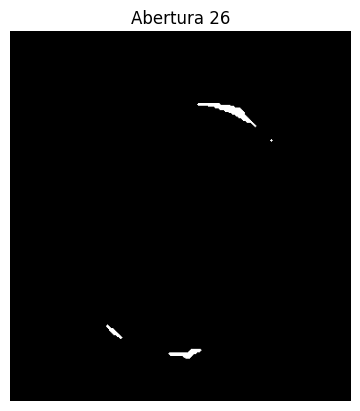

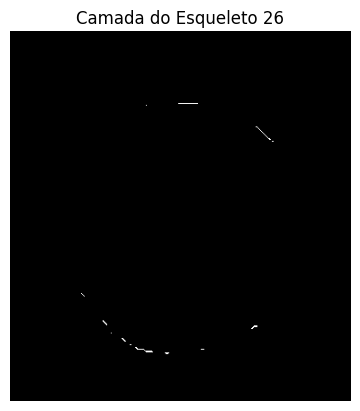

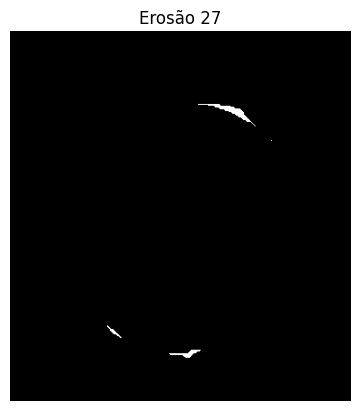

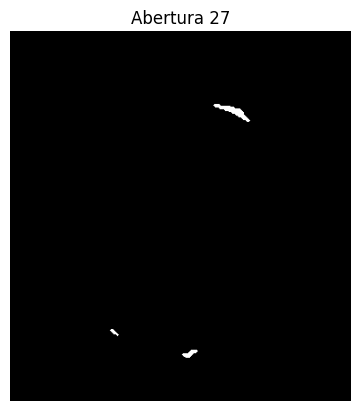

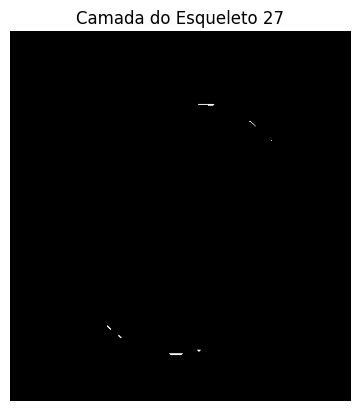

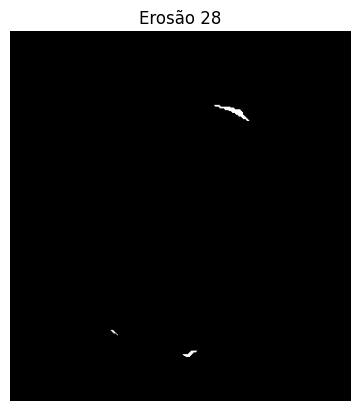

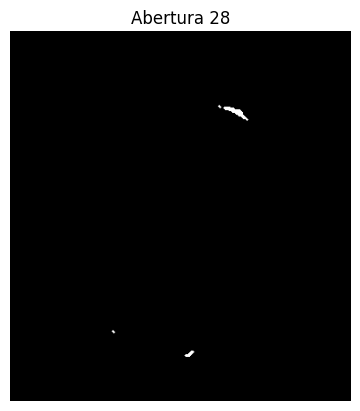

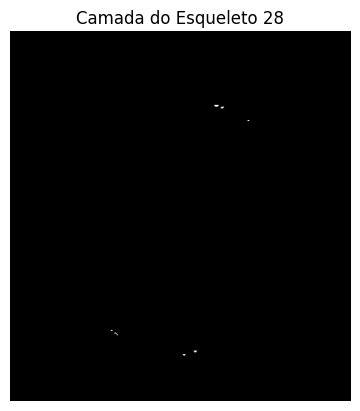

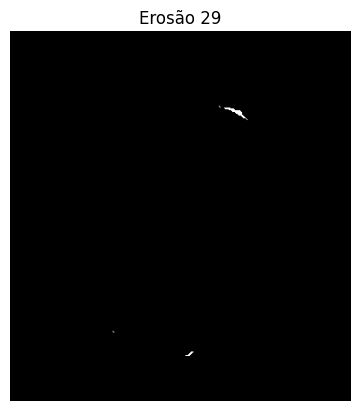

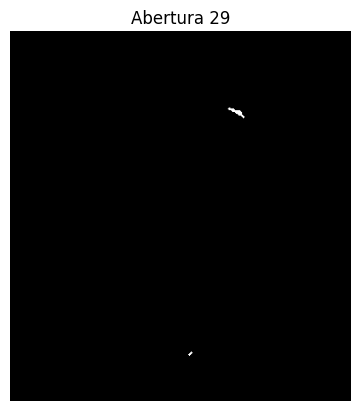

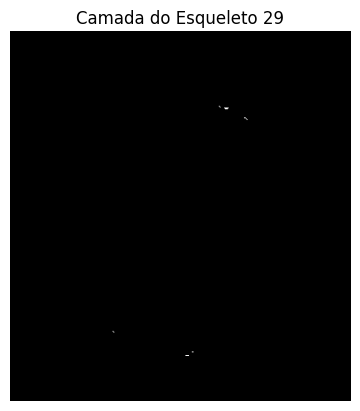

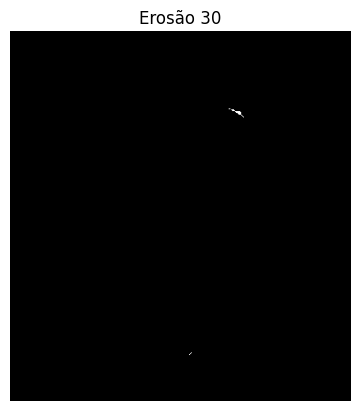

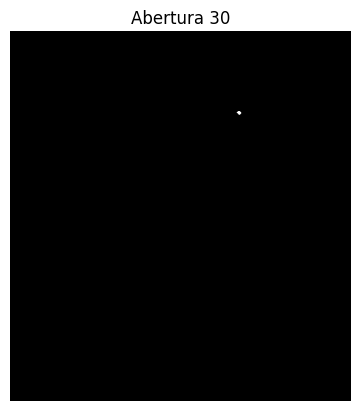

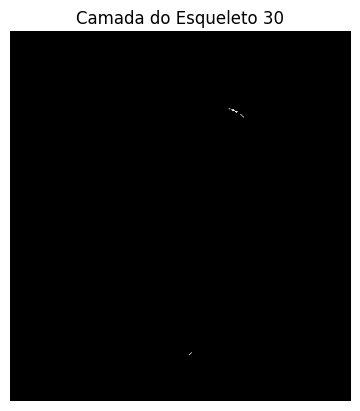

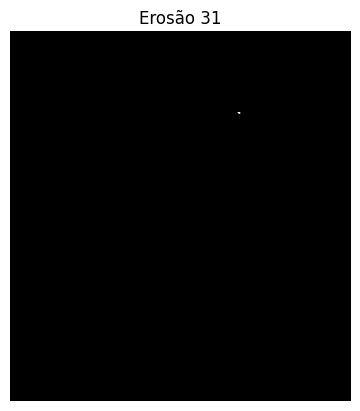

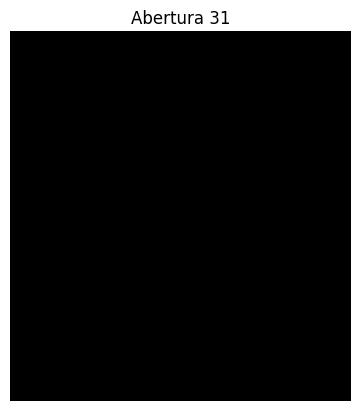

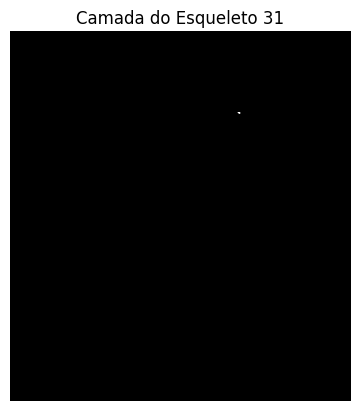

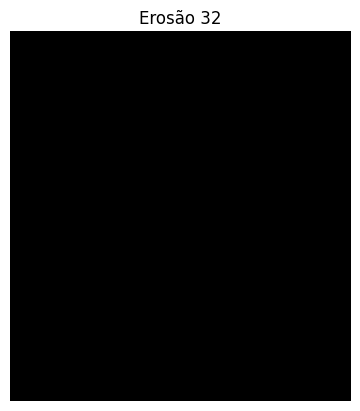

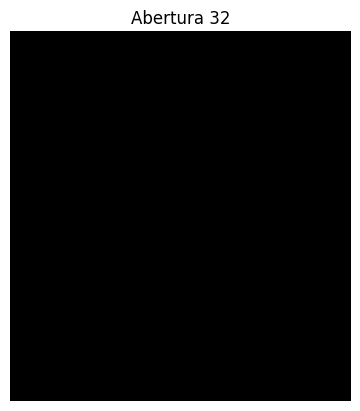

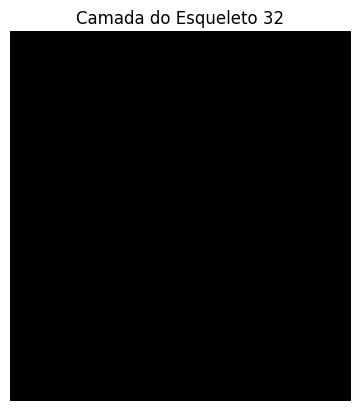

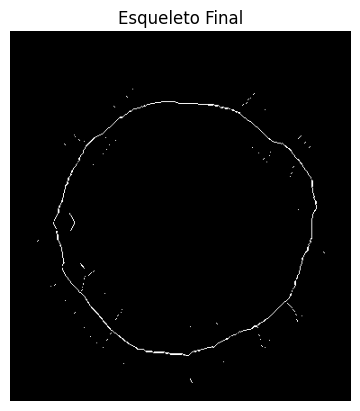

In [135]:
# Carregar e binarizar a imagem de entrada
imagem_binaria = carregar_e_binarizar_imagem("im_5_2.png")

# Mostrar a imagem original
mostrar_imagem(imagem_binaria, "Imagem Binária Original")

# Aplicar o algoritmo de esqueletonização
skeleton = skeletonize(imagem_binaria, B)

# Mostrar o esqueleto final
mostrar_imagem(skeleton, "Esqueleto Final")

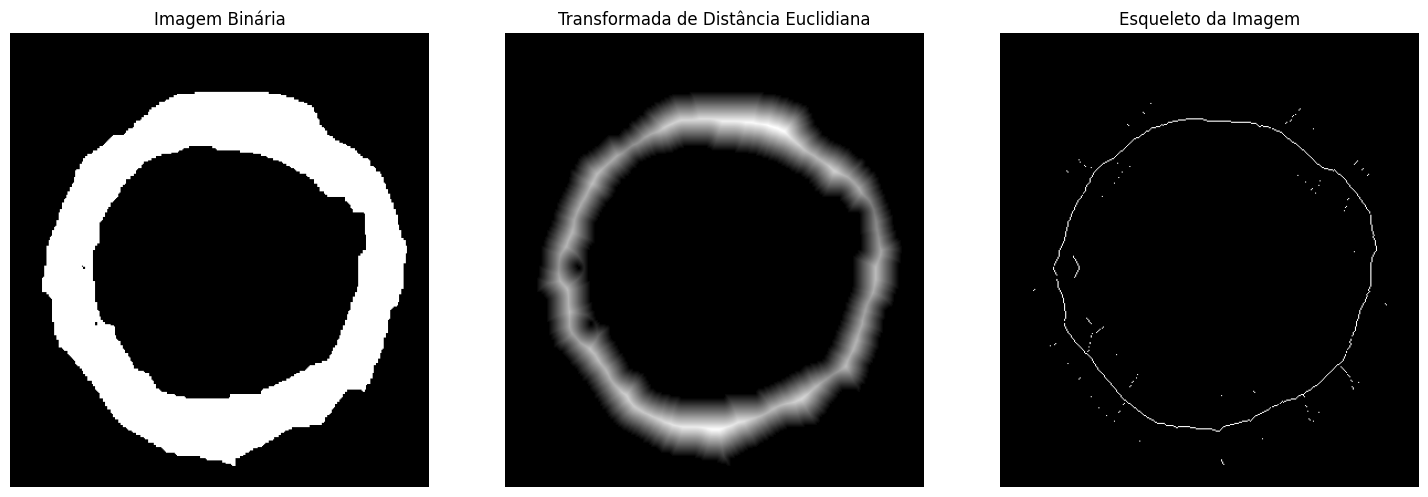

In [136]:
# Calcular a transformada de distância Euclidiana
distancia = distance_transform_edt(imagem_binaria)

# Aplicar a extração do esqueleto na transformada de distância
esqueleto = morphology.skeletonize(skeleton)

# Exibir os resultados
plt.figure(figsize=(15, 5))

# Imagem Binária
plt.subplot(1, 3, 1)
plt.imshow(imagem_binaria, cmap='gray')
plt.title('Imagem Binária')
plt.axis('off')

# Transformada de Distância Euclidiana
plt.subplot(1, 3, 2)
plt.imshow(distancia, cmap='gray')
plt.title('Transformada de Distância Euclidiana')
plt.axis('off')

# Esqueleto
plt.subplot(1, 3, 3)
plt.imshow(esqueleto, cmap='gray')
plt.title('Esqueleto da Imagem')
plt.axis('off')

plt.tight_layout()
plt.show()

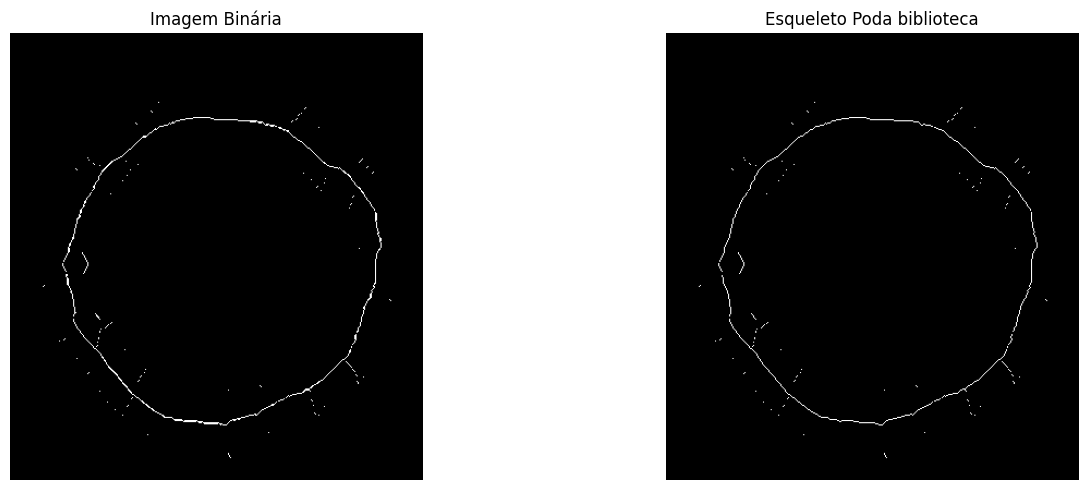

In [137]:
# Exibir os resultados
plt.figure(figsize=(15, 5))

# Imagem Binária
plt.subplot(1, 2, 1)
plt.imshow(skeleton, cmap='gray')
plt.title('Imagem Binária')
plt.axis('off')

# Esqueleto Poda biblioteca
plt.subplot(1, 2, 2)
plt.imshow(esqueleto, cmap='gray')
plt.title('Esqueleto Poda biblioteca')
plt.axis('off')


# plt.subplot(1, 3, 3)
# plt.imshow(esqueleto, cmap='gray')
# plt.title('Esqueleto da Imagem')
# plt.axis('off')

plt.tight_layout()
plt.show()


## Outros Tipos de Algoritmos

In [138]:
# Função para contar o número de vizinhos ativos
def count_neighbors(image, x, y):
    neighbors = [
        image[x-1, y], image[x-1, y+1], image[x, y+1], image[x+1, y+1],
        image[x+1, y], image[x+1, y-1], image[x, y-1], image[x-1, y-1]
    ]
    return sum(neighbors)

In [139]:
# Função para contar o número de transições de 0 para 1
def count_transitions(image, x, y):
    neighbors = [
        image[x-1, y], image[x-1, y+1], image[x, y+1], image[x+1, y+1],
        image[x+1, y], image[x+1, y-1], image[x, y-1], image[x-1, y-1]
    ]
    transitions = sum((neighbors[i] == 0 and neighbors[i + 1] == 1) for i in range(7))
    transitions += (neighbors[7] == 0 and neighbors[0] == 1)  # Verifica a transição circular
    return transitions

#### Algoritmos Sequenciais

In [140]:
# Função para aplicar o passo 1 da esqueletonização com condições (a), (b), (c), (d)
def thinning_step1(image):
    marker = np.zeros_like(image, dtype=bool)
    for x in range(1, image.shape[0] - 1):
        for y in range(1, image.shape[1] - 1):
            if image[x, y] == 1:
                nn = count_neighbors(image, x, y)
                crn = count_transitions(image, x, y)
                p2, p4, p6, p8 = image[x-1, y], image[x, y+1], image[x+1, y], image[x, y-1]
                # Condições (a), (b), (c), (d)
                if 2 <= nn <= 6 and crn == 1 and p2 * p4 * p6 == 0 and p4 * p6 * p8 == 0:
                    marker[x, y] = True
    image[marker] = 0

In [141]:
# Função para aplicar o passo 2 da esqueletonização com condições (a), (b), (c'), (d')
def thinning_step2(image):
    marker = np.zeros_like(image, dtype=bool)
    for x in range(1, image.shape[0] - 1):
        for y in range(1, image.shape[1] - 1):
            if image[x, y] == 1:
                nn = count_neighbors(image, x, y)
                crn = count_transitions(image, x, y)
                p2, p4, p6, p8 = image[x-1, y], image[x, y+1], image[x+1, y], image[x, y-1]
                # Condições (a), (b), (c'), (d')
                if 2 <= nn <= 6 and crn == 1 and p2 * p4 * p8 == 0 and p2 * p6 * p8 == 0:
                    marker[x, y] = True
    image[marker] = 0

In [142]:
# Função principal para aplicar a esqueletonização completa
def sequential_skeletonize(image):
    binary_image = image.copy()
    changing = True
    while changing:
        prev_image = binary_image.copy()
        thinning_step1(binary_image)
        thinning_step2(binary_image)
        changing = not np.array_equal(prev_image, binary_image)
    return binary_image

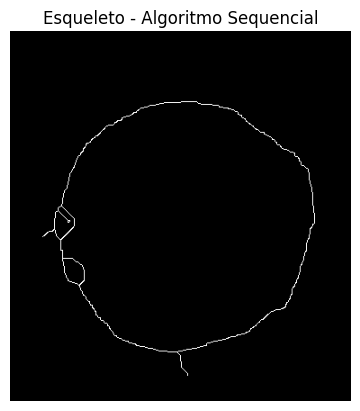

In [143]:
# Carregar a imagem binária (binarizada) e aplicar o algoritmo de esqueletonização sequencial
# Aqui, imagem_binaria deve ser uma matriz binária onde pixels de fundo são 0 e pixels do objeto são 1
imagem_binaria = carregar_e_binarizar_imagem("im_5_2.png")  # Substitua por sua função de carregamento de imagem
skeleton_sequential = sequential_skeletonize(imagem_binaria)

# Mostrar resultado
plt.imshow(skeleton_sequential, cmap='gray')
plt.title("Esqueleto - Algoritmo Sequencial")
plt.axis("off")
plt.show()


#### Algoritmos Paralelos

In [144]:
# Primeira subiteração do algoritmo de Zhang-Suen
def zhang_suen_step1(image):
    marker = np.zeros_like(image, dtype=bool)
    for x in range(1, image.shape[0] - 1):
        for y in range(1, image.shape[1] - 1):
            if image[x, y] == 1:
                nn = count_neighbors(image, x, y)
                crn = count_transitions(image, x, y)
                p2, p4, p6, p8 = image[x-1, y], image[x, y+1], image[x+1, y], image[x, y-1]
                # Condições Z1, Z2, Z3 e Z4
                if 2 <= nn <= 6 and crn == 1 and p2 * p4 * p6 == 0 and p4 * p6 * p8 == 0:
                    marker[x, y] = True
    image[marker] = 0

In [145]:
# Segunda subiteração do algoritmo de Zhang-Suen
def zhang_suen_step2(image):
    marker = np.zeros_like(image, dtype=bool)
    for x in range(1, image.shape[0] - 1):
        for y in range(1, image.shape[1] - 1):
            if image[x, y] == 1:
                nn = count_neighbors(image, x, y)
                crn = count_transitions(image, x, y)
                p2, p4, p6, p8 = image[x-1, y], image[x, y+1], image[x+1, y], image[x, y-1]
                # Condições Z1, Z2, Z3' e Z4'
                if 2 <= nn <= 6 and crn == 1 and p2 * p4 * p8 == 0 and p2 * p6 * p8 == 0:
                    marker[x, y] = True
    image[marker] = 0

In [146]:
# Função principal para aplicar o algoritmo de Zhang-Suen
def zhang_suen_skeletonize(image):
    binary_image = image.copy()
    changing = True
    while changing:
        prev_image = binary_image.copy()
        zhang_suen_step1(binary_image)
        zhang_suen_step2(binary_image)
        changing = not np.array_equal(prev_image, binary_image)
    return binary_image

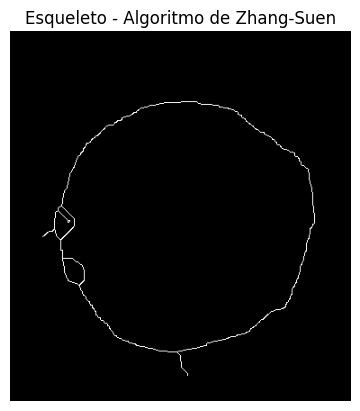

In [147]:
# Carregar a imagem binária (binarizada) e aplicar o algoritmo de Zhang-Suen
imagem_binaria = carregar_e_binarizar_imagem("im_5_2.png")  # Substitua por sua função de carregamento de imagem
skeleton_zhang_suen = zhang_suen_skeletonize(imagem_binaria)

# Mostrar resultado
plt.imshow(skeleton_zhang_suen, cmap='gray')
plt.title("Esqueleto - Algoritmo de Zhang-Suen")
plt.axis("off")
plt.show()


#### Algoritmos Métodos Não-Iterativos

In [148]:
from skimage.io import imread
from skimage.color import rgb2gray

In [149]:
# Função para encontrar o ponto central entre dois pontos
def ponto_central(x1, x2):
    return (x1 + x2) // 2

In [150]:
# Função para identificar o esqueleto usando varredura não-iterativa
def esqueleto_nao_iterativo(imagem_binaria):
    esqueleto = np.zeros_like(imagem_binaria, dtype=bool)
    
    # Varredura linha por linha
    for y in range(imagem_binaria.shape[0]):
        linha = imagem_binaria[y, :]
        pontos_ativos = np.where(linha == 1)[0]  # Índices dos pixels ativos na linha
        
        if len(pontos_ativos) < 2:
            continue  # Pula se não houver um contorno definido

        # Definir os pontos da borda inicial
        LP, RP = pontos_ativos[0], pontos_ativos[-1]
        
        # Encontrar o ponto central e marcar no esqueleto
        while LP < RP:
            ponto_central_x = ponto_central(LP, RP)
            esqueleto[y, ponto_central_x] = 1  # Adiciona o ponto ao esqueleto
            
            # Encontrar os próximos pontos na borda
            proximo_LP = pontos_ativos[pontos_ativos > ponto_central_x]
            proximo_RP = pontos_ativos[pontos_ativos < ponto_central_x]

            if len(proximo_LP) > 0 and len(proximo_RP) > 0:
                # Atualizar LP e RP para continuar a varredura
                LP, RP = proximo_LP[0], proximo_RP[-1]
            else:
                break  # Finalizar se não houver mais bordas para processar

    return esqueleto

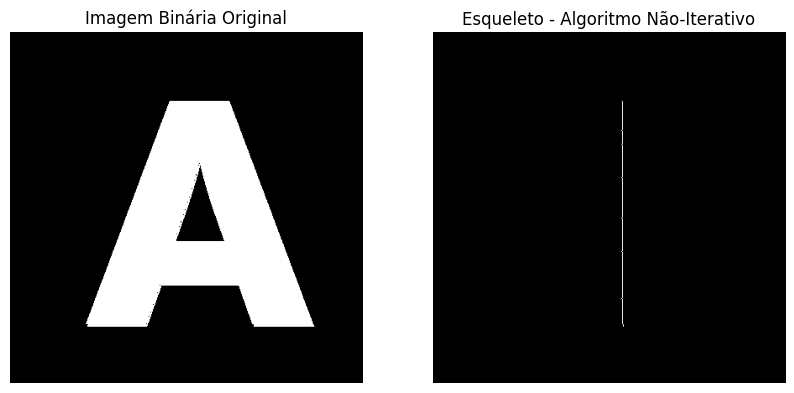

In [151]:
# Carregar a imagem binária e aplicar o algoritmo de esqueletonização não-iterativo
imagem_binaria = carregar_e_binarizar_imagem("aaa.png")  # Substitua pelo caminho da imagem
skeleton_non_iterative = esqueleto_nao_iterativo(imagem_binaria)

# Mostrar a imagem original e o esqueleto gerado
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagem_binaria, cmap="gray")
plt.title("Imagem Binária Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(skeleton_non_iterative, cmap="gray")
plt.title("Esqueleto - Algoritmo Não-Iterativo")
plt.axis("off")
plt.show()


Poda

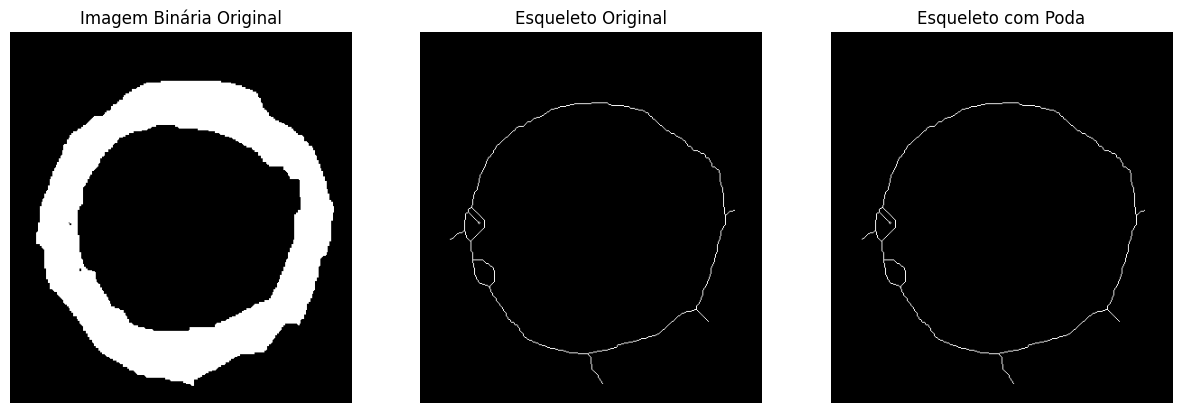

In [152]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
from skimage.io import imread
from skimage.color import rgb2gray

def carregar_e_binarizar_imagem(caminho_imagem):
    imagem = imread(caminho_imagem, as_gray=True)
    imagem_binaria = imagem < 0.5  # Binarização: pixels pretos (0) e brancos (1)
    return imagem_binaria

def contar_vizinhos(pixels, i, j):
    # Função auxiliar para contar vizinhos de um pixel
    vizinhos = [
        (i-1, j), (i+1, j), (i, j-1), (i, j+1),
        (i-1, j-1), (i-1, j+1), (i+1, j-1), (i+1, j+1)
    ]
    return sum(1 for x, y in vizinhos if pixels[x, y] == 1)

def poda(skeleton, min_comprimento=5):
    # Criação de uma cópia do esqueleto para ser podada
    skel_podado = skeleton.copy()
    for i in range(1, skeleton.shape[0] - 1):
        for j in range(1, skeleton.shape[1] - 1):
            if skel_podado[i, j] == 1:
                vizinhos_ativos = contar_vizinhos(skel_podado, i, j)
                
                # Detecta ponto terminal e remove ramificações curtas
                if vizinhos_ativos == 1:  # Pixel terminal
                    comprimento = 0
                    x, y = i, j
                    while comprimento < min_comprimento:
                        # Encontrar o próximo pixel no segmento
                        vizinhos = [(x-1, y), (x+1, y), (x, y-1), (x, y+1)]
                        proximos = [(vx, vy) for vx, vy in vizinhos if skel_podado[vx, vy] == 1]
                        
                        if len(proximos) == 1:
                            nx, ny = proximos[0]
                            skel_podado[x, y] = 0  # Remover o ponto atual
                            x, y = nx, ny
                            comprimento += 1
                        else:
                            break  # Finaliza se encontrar um ponto com mais de um vizinho
    return skel_podado

# Carregar a imagem binária e extrair o esqueleto
imagem_binaria = carregar_e_binarizar_imagem("im_5_2.png")  # Substitua pelo caminho da imagem
skeleton = skeletonize(imagem_binaria)

# Aplicar poda ao esqueleto
skeleton_podado = poda(skeleton, min_comprimento=5)

# Mostrar a imagem original, o esqueleto e o esqueleto podado
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(imagem_binaria, cmap="gray")
plt.title("Imagem Binária Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(skeleton, cmap="gray")
plt.title("Esqueleto Original")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(skeleton_podado, cmap="gray")
plt.title("Esqueleto com Poda")
plt.axis("off")

plt.show()

(-0.5, 378.5, 410.5, -0.5)

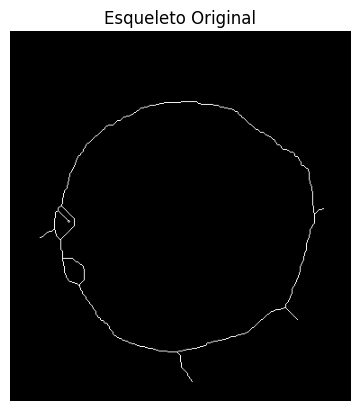

In [153]:

plt.imshow(skeleton, cmap="gray")
plt.title("Esqueleto Original")
plt.axis("off")


teste

In [154]:
import numpy as np

# Definindo os elementos estruturantes de acordo com a figura
def criar_elementos_estruturantes():
    elementos = []
    elementos.append(np.array([[0, 1, 0], [0, 1, 0], [1, 1, 1]]))  # B1
    elementos.append(np.array([[1, 0, 0], [1, 1, 0], [1, 0, 0]]))  # B2
    elementos.append(np.array([[1, 1, 1], [0, 1, 0], [0, 1, 0]]))  # B3
    elementos.append(np.array([[0, 0, 1], [0, 1, 1], [0, 0, 1]]))  # B4
    elementos.append(np.array([[1, 1, 1], [0, 1, 0], [0, 0, 1]]))  # B5
    elementos.append(np.array([[1, 0, 0], [1, 1, 0], [1, 0, 1]]))  # B6
    elementos.append(np.array([[0, 1, 1], [0, 1, 0], [1, 1, 1]]))  # B7
    elementos.append(np.array([[0, 0, 1], [0, 1, 1], [1, 1, 1]]))  # B8
    return elementos


In [155]:
from scipy.ndimage import binary_hit_or_miss
import numpy as np

def aplicar_afinamento(imagem, elementos_estruturantes):
    afinada = imagem.copy()
    for b in elementos_estruturantes:
        afinada = np.logical_and(afinada, np.logical_not(binary_hit_or_miss(afinada, b)))
    return afinada

In [156]:
from scipy.ndimage import binary_dilation

def detectar_pontos_extremidade(imagem, elementos_estruturantes):
    pontos_extremidade = np.zeros_like(imagem)
    for b in elementos_estruturantes:
        pontos_extremidade = np.logical_or(pontos_extremidade, binary_hit_or_miss(imagem, b))
    return pontos_extremidade

def dilatar_pontos_extremidade(pontos, n=3):
    dilatado = pontos.copy()
    for _ in range(n):
        dilatado = binary_dilation(dilatado)
    return dilatado


In [157]:
def interseccionar(imagem1, imagem2):
    return np.logical_and(imagem1, imagem2)

# Função principal para o processo de poda
def processo_poda_exemplo(imagem):
    elementos_estruturantes = criar_elementos_estruturantes()

    # Passo (j): Afinamento
    imagem_afinada = aplicar_afinamento(imagem, elementos_estruturantes)
    plt.imshow(imagem_afinada, cmap="gray")
    plt.title("Imagem X1 - Após Afinamento")
    plt.show()

    # Passo (k): Detectar e Dilatar pontos de extremidade
    pontos_extremidade = detectar_pontos_extremidade(imagem_afinada, elementos_estruturantes)
    dilatado = dilatar_pontos_extremidade(pontos_extremidade)

    # Passo (l): Interseção com imagem original
    imagem_final = interseccionar(dilatado, imagem)

    # Resultado final (m)
    resultado = np.logical_or(imagem_afinada, imagem_final)
    plt.imshow(resultado, cmap="gray")
    plt.title("Imagem X4 - Após Poda")
    plt.show()


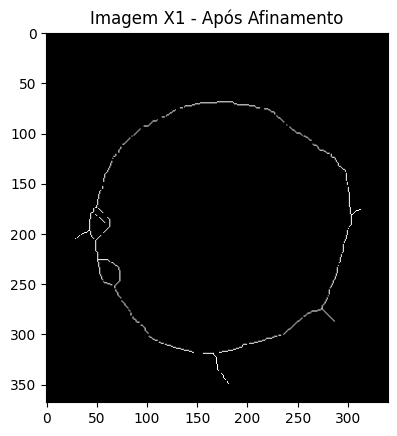

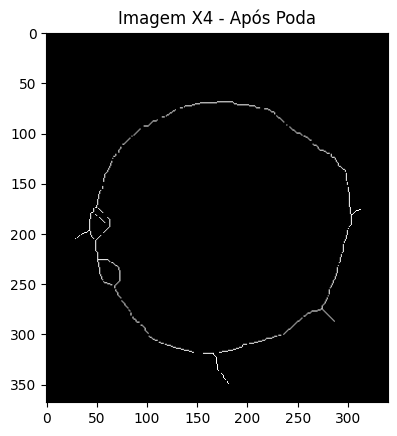

In [158]:
# Carregar imagem binária de teste
from skimage import io
imagem = io.imread('esqueleto_im_5.png', as_gray=True) > 0.5

# Executar o exemplo de poda
processo_poda_exemplo(imagem)
